In [2]:
import os
from enum import Enum
import pandas as pd
import re
import numpy as np
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
from metadata.metadata import ACL_metadata
from metadata import Gender
from collections import defaultdict
from itertools import chain
# (*) To communicate with Plotly's server, sign in with credentials file
# import plotly.plotly as py  

# #(*) Useful Python/Plotly tools
# import plotly.tools as tls   

# #(*) Graph objects to piece together plots
# from plotly.graph_objs import *
# import plotly 
# plotly.tools.set_credentials_file(username='RamonaComanescu', api_key='ZZR0OIrpZCow6nTAUPR0')
# plotly.offline.init_notebook_mode()
%matplotlib inline

In [3]:
acl = ACL_metadata()
auths = acl.auths
known = acl.known
known_f = acl.known_f
known_m = acl.known_m
unique_ids = acl.ids
new_unknown = acl.unk
df = acl.meta_df

Remember to use acl.modeling_files and modeling_df for topic modeling


## General statistics

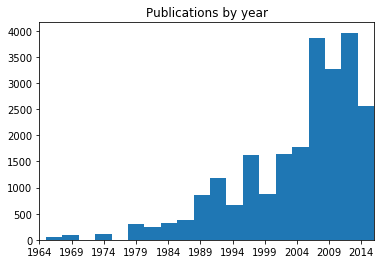

In [4]:
a=list(map(lambda x: int(x), list(df["year"].values)))
plt.hist(a, bins = 20)
plt.xlim([1980,2016])
plt.xticks(np.arange(1964,2015,5))
plt.title("Publications by year")
plt.savefig("plots/PublicationsByYear")
plt.show()

In [5]:
print("{0} papers and {1} unique authors".format(df.shape[0],len(acl.auths)))
print("Average papers per authors {0:.2f}".format(df.shape[0]/len(acl.auths)))

23766 papers and 18135 unique authors
Average papers per authors 1.31


In [6]:
categories =list( map(lambda e: e.value,list(chain.from_iterable(df["genders"].values))))
from collections import Counter

In [7]:
f = [0] * len(known_f)
m = [1] * len(known_m)
u = [2] * len(new_unknown)

In [8]:
new_unknown

{'Zhang,Renxian',
 'Peng,Nanyun',
 'Song,Mansuk',
 'Padra3,Muntsa',
 'Li,Dingcheng',
 'Roudaud,B',
 'Yue,Lihua',
 'Wang,Wenting',
 'Su,Fangzhong',
 'Lochak,D',
 'Ilknur,Pehlivan',
 'Desi,M',
 'Zheng,Yanzhen',
 'Lahiri,Shibamouli',
 'Hesse,H',
 'Shidahara,Yo',
 'Li,Li',
 'Nishida,O',
 'Ji,Yangsheng',
 'Rohini,U',
 'Martins,Andra',
 'Jian,Jiayan',
 'Chen,Yufeng',
 'Carcagno,D',
 'Gopfert,Janphilip',
 'Drewek,R',
 'Liu,Ming',
 'Yan,Jun',
 'Saravanan,M',
 'He,He',
 'Luo,Dingsheng',
 'Kao,Tinghui',
 'Villar,C',
 'Li,Nan',
 'Feizabadi,Parvinsadat',
 'Ochel,K',
 'Fox,R',
 'Yang,Nan',
 'Yeung,D',
 'Beckles,D',
 'Gao,Mingkun',
 'Ji,Zongcheng',
 'Xu,Xingjun',
 'Wang,Tingxuan',
 'Smaili,N',
 'Wu,Yuqian',
 'Fu,Xingshang',
 'Labropoulou,P',
 'Lang,E',
 'Long,Bo',
 'Minvaleev,R',
 'Liu,Maofu',
 'Kwitakowski,W',
 'Li,Zezhong',
 'Gorbe,J',
 'Hacene,Taouise',
 'Hu,Renfen',
 'Guillotin,T',
 'Zhang,Yuchen',
 'Su,Yingshan',
 'Pham,Dangduc',
 'Qian,Tao',
 'Valencia,A',
 'Moon,Sungrim',
 'Ma,Ji',
 'Piug,Den

## Unique authors who have published at least a paper

In [9]:
print("Total papers: {0}".format(len(known_f)+len(known_m)+len(new_unknown)))
n = len(auths)
print("Females: {0}, Males: {1}, Unknown: {2}".format(len(known_f),len(known_m),len(new_unknown)))
print("Females: {0:.2f} Males: {1:.2f} Unknown: {2:.2f}".format(len(known_f)/n, len(known_m)/n,len(new_unknown)/n))

Total papers: 18158
Females: 4894, Males: 12261, Unknown: 1003
Females: 0.27 Males: 0.68 Unknown: 0.06


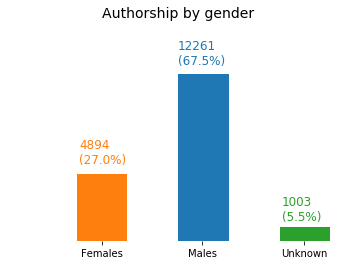

In [17]:
n = len(known_f)+len(known_m)+len(new_unknown)
axes  = plt.gca()
plt.hist([m,f,u], bins = [0,1,2], rwidth=1)
#plt.scatter(0,1300)
plt.xticks([0.5, 1.16, 1.83],["Females","Males","Unknown"])
plt.yticks([])
plt.ylim(0,16000)
axes.spines["top"].set_visible(False)    
axes.spines["bottom"].set_visible(False)    
axes.spines["right"].set_visible(False)    
axes.spines["left"].set_visible(False)
axes.get_yaxis().tick_left()    
plt.text(0.35, 5700, "{0}\n({1:.1f}%)".format(len(known_f),len(known_f)/n*100), fontsize=12, color=colors[0])

plt.text(1, 13000, "{0}\n({1:.1f}%)".format(len(known_m),len(known_m)/n*100), fontsize=12, color=colors[1])

plt.text(1.68, 1500, "{0}\n({1:.1f}%)".format(len(new_unknown),len(new_unknown)/n*100), fontsize=12, color=colors[2])

plt.title("Authorship by gender", fontsize=14)
plt.savefig("plots/Authorshipbygender.pdf")
plt.show()
plt.show()

### m

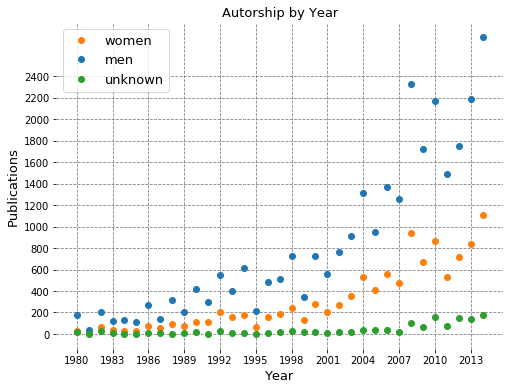

In [90]:
plt.figure(figsize=(8,6))
ax  = plt.gca()
yrs = []
x = []
y = []
z = []
year_range = [1980,2015]
for i in range(year_range[0],year_range[1]):
    year = df[df["year"] == i]
    auths = set(chain.from_iterable(year["authors"]))
    yf=0
    ym=0
    yu=0
    for a in auths:
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x.append(yf)
    y.append(ym)
    z.append(yu)
    plt.plot(i,yf, 'o', color=fc, label="women")
    plt.plot(i,ym, 'o', color=mc, label="men")
    plt.plot(i,yu, 'o', color=uc, label="unknown")
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.ylabel("Publications",fontsize=13)
plt.xlabel("Year",fontsize=13)
plt.yticks(np.arange(0,2600,200))
plt.xticks(np.arange(1980,2015,3))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.title("Autorship by Year",fontsize=13)
plt.savefig("plots/AuthorshipByYear.pdf")
plt.legend(fontsize=13)
plt.show()

## Papers in which at least one authors is a given gender

In [91]:
total = np.array(x) + np.array(y) + np.array(z)
perc_f = x/(total+10e-6) * 100
perc_m = y/(total+10e-6) * 100
perc_u = z/(total+10e-6) * 100

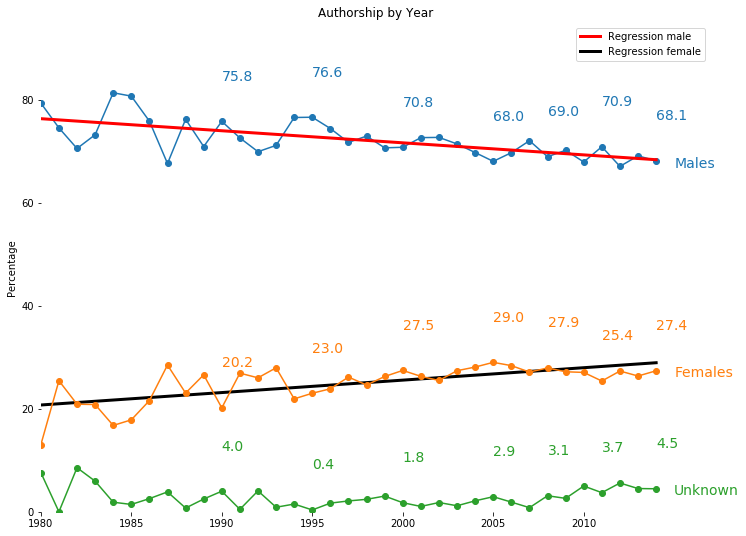

In [92]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  


def clamp(x): 
    return max(0, min(x, 255))
def get_htmlcol(c):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(c[0]), clamp(c[1]), clamp(c[2]))

colors = [get_htmlcol(tableau20[2]),get_htmlcol(tableau20[0]),get_htmlcol(tableau20[4])]
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    
mc = tableau20[0]
fc = tableau20[2]
uc = tableau20[4] 
plt.plot(yrs,perc_m,'-o', color = mc)
plt.plot(yrs,f_grid_male,'-',label="Regression male", color = "r", linewidth=3)
plt.plot(yrs,f_grid_female,'-', label = "Regression female",color = "black", linewidth=3)
#plt.plot(yrs[:-6],f_grid_old,'--',label="Old regression line", color = "black")
plt.text(year_range[1], perc_m[-1] - 1.2, "Males", fontsize=14, color = mc)  
plt.plot(yrs,perc_f,'-o', color = fc)
plt.text(year_range[1], perc_f[-1] - 1, "Females", fontsize=14, color = fc) 
plt.plot(yrs,perc_u,'-o', color = uc)
plt.text(year_range[1], perc_u[-1] - 1, "Unknown", fontsize=14, color = uc)  
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
plt.legend()
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 90)    
plt.xlim(year_range[0], year_range[1] + 2)    
for f,yr in enumerate([-1, -4 , -7, -10, -15, -20, - 25]):
    for i,m in enumerate([perc_f, perc_m, perc_u]):
        plt.text(yrs[yr], m[yr] + 8, "{0:.1f}".format(m[yr]), fontsize=14, color=colors[i])
        
b=np.arange(year_range[0],year_range[1],5)
plt.xticks(b)
plt.ylim(0,95)
plt.ylabel("Percentage")
plt.title("Authorship by Year")
mpl_fig1 = plt.gcf()
plt.savefig("plots/GenderByYearLabels.pdf")
plt.show()
#COOauthors
#ratios

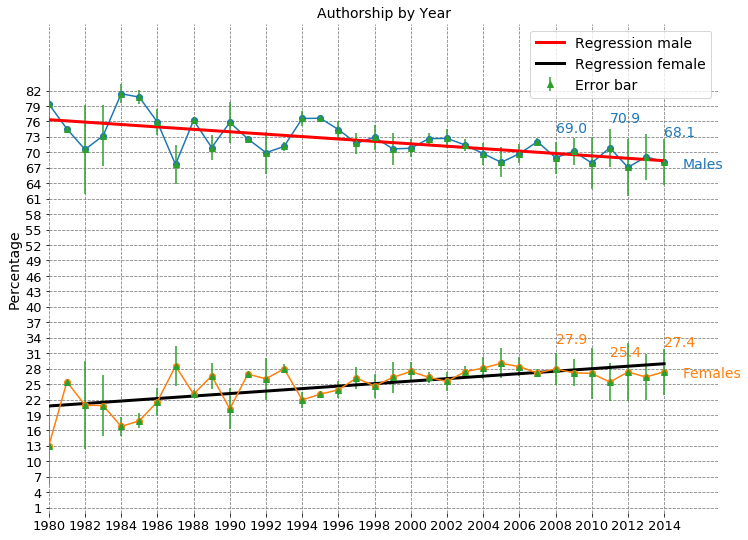

In [72]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  


def clamp(x): 
    return max(0, min(x, 255))
def get_htmlcol(c):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(c[0]), clamp(c[1]), clamp(c[2]))

colors = [get_htmlcol(tableau20[2]),get_htmlcol(tableau20[0]),get_htmlcol(tableau20[4])]
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    
mc = tableau20[0]
fc = tableau20[2]
uc = tableau20[4] 
plt.plot(yrs,perc_m,'-o', color = mc)
plt.plot(yrs,f_grid_male,'-',label="Regression male", color = "r", linewidth=3)
plt.plot(yrs,f_grid_female,'-', label = "Regression female",color = "black", linewidth=3)
#plt.plot(yrs[:-6],f_grid_old,'--',label="Old regression line", color = "black")
plt.text(year_range[1], perc_m[-1] - 1.2, "Males", fontsize=14, color = mc)  
plt.plot(yrs,perc_f,'-o', color = fc)
plt.text(year_range[1], perc_f[-1] - 1, "Females", fontsize=14, color = fc) 

plt.errorbar(yrs, perc_f, perc_u, linestyle='None', marker='^', label="Error bar", color = colors[2])
plt.errorbar(yrs, perc_m, perc_u, linestyle='None', marker='^', color = colors[2])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
plt.legend(fontsize=14)
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(0, 90)    
plt.xlim(year_range[0], year_range[1] + 2)    
for f,yr in enumerate([-1, -4 , - 7]):
    for i,m in enumerate([perc_f, perc_m]):
        plt.text(yrs[yr] , m[yr] + 5, "{0:.1f}".format(m[yr]), fontsize=14, color=colors[i])
        
b=np.arange(year_range[0],year_range[1]+1,2)
plt.xticks(b, fontsize=13)
plt.yticks(np.arange(1,83,3),fontsize=13)
plt.ylim(0,95)
plt.ylabel("Percentage",fontsize=14)
plt.title("Authorship by Year",fontsize=14)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
mpl_fig1 = plt.gcf()
plt.savefig("plots/GenderByYearLabelsErrorBar.pdf",bbox="tight")
plt.show()
#COOauthors
#ratios

In [46]:
yrs[-7]

2008

In [21]:
import numpy as np
x = np.array(list(map(lambda a: [a, 1], yrs)))
y = np.array(list(map(lambda a: [a], perc_m)))
w_fit=np.linalg.lstsq(x,y)[0]
print(w_fit)
f_grid_male = np.dot(x,w_fit)

y = np.array(list(map(lambda a: [a], perc_f)))
w_fit=np.linalg.lstsq(x,y)[0]
print(w_fit)
f_grid_female = np.dot(x,w_fit)

w_j = np.array([[0.3429],[-659.48]])
f_grid_old = np.dot(x,w_j)

[[ -2.34243788e-01]
 [  5.40137058e+02]]
[[  2.41363099e-01]
 [ -4.57159237e+02]]


In [16]:
x = np.array(list(map(lambda a: [a, 1], yrs[:-6])))
y = np.array(list(map(lambda a: [a], perc_m[:-6])))
w_j=np.linalg.lstsq(x,y)[0]
#x = np.array(list(map(lambda a: [a, 1], yrs)))
f_grid_old = np.dot(x,w_j)

LinAlgError: 1-dimensional array given. Array must be two-dimensional

In [30]:
py_fig1 = tls.mpl_to_plotly(mpl_fig1, verbose=False, strip_style=True)
# (1) Plot mpl figure object as a Plotly plot with default style options
# Delete misplaced legend annotations 
py_fig1['layout'].pop('annotations', None)

legends = [dict(
        x=yrs[-1] + 3,
        y=perc_m[-1] + 2,
        xref='x',
        yref='y',
        text="Males",
        ax=0,
        ay=-2,
    
     font=dict(
                family='Courier New, monospace',
                size=14,
                color= colors[1]
            ),
    ),
                  
                  dict(
        x=yrs[-1] + 3,
        y=perc_f[-1] + 2,
        xref='x',
        yref='y',
        text="Females",
        ax=0,
        ay=-2,
                       font=dict(
                family='Courier New, monospace',
                size=14,
                color= colors[0]
            ),
    ),
                        dict(
        x=yrs[-1] + 3,
        y=perc_u[-1] + 2,
        xref='x',
        yref='y',
        text="Unknown",
        ax=0,
        ay=-2,
                             font=dict(
                family='Courier New, monospace',
                size=14,
                color= colors[2]
            ),
    )]

tags = []
cols = [fc,mc, uc]
for f,yr in enumerate([-1, -4 , -7, -10, -15, -20, - 25]):
    for i,m in enumerate([perc_f, perc_m, perc_u]):
        tags.append( dict(
            x=yrs[yr] ,
            y=m[yr] + 1,
            xref='x',
            yref='y',
            text="{0:.1f}".format(m[yr]),
            ax=0,
            ay=-40,
              font=dict(
                family='Courier New, monospace',
                size=14,
                color= colors[i]
            ),
             arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            opacity = 0.7,
            align= "center", 
            arrowcolor= colors[i],
             showarrow = True,
#             arrowhead = 2
        
        ))

# Add legend, place it at the top right corner of the plot
py_fig1['layout'].update(
#     showlegend=True,
#     legend=Legend(
#         x=1.05,
#         y=1
#     ),
    hovermode = "compare",
    annotations = tags + legends
)


# Send updated figure object to Plotly, show result in notebook
py.iplot(py_fig1, filename='BestGenderByYear.pdf')

In [22]:
import plotly.offline as offline
offline.iplot(py_fig1,
             image='svg')